In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import simulation as sim
import plot as pl
sns.set_context('talk')
sns.set_style("ticks")

In [2]:
enames = {'ET_NRK1': 'NadR', 'ET_NT5': 'SurE', 'ET_NMNAT1': 'NadD', 'ET_NAPRT': 'PncB', 'ET_NADS': 'NadE', 
          'ET_NAMPT': 'Nampt', 'ET_PNCA': 'PncA'}
# df = pd.read_csv('./optimisedET_maxNAD.csv', sep='\t')
df = pd.read_csv('../data/new_PN_Keq_max_NAD_1.csv', sep='\t')
df = df.rename(columns=enames)
df1 = df.replace([np.inf, -np.inf], np.nan)
df1['objective'] = 'max_NAD'
df1.loc[(df1.Nampt <= 0.01), 'pathway'] = 'PncA'
df1.loc[(df1.PncA <= 0.01), 'pathway'] = 'Nampt'
df1 = df1.dropna(axis=0)

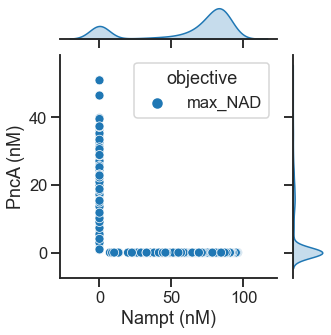

In [25]:
scaling = 1e-10 * 1e-3 * 1e9
df_ = df1[df1.objective == 'max_NAD']
jp = sns.jointplot(data=df_, x=df_["Nampt"]*scaling, y=df_["PncA"]*scaling, hue="objective", space=0.5, height=5)
jp.set_axis_labels('Nampt (nM)', 'PncA (nM)')
jp.savefig('../images/new_jointplot_max_NAD_1.png', dpi=300)

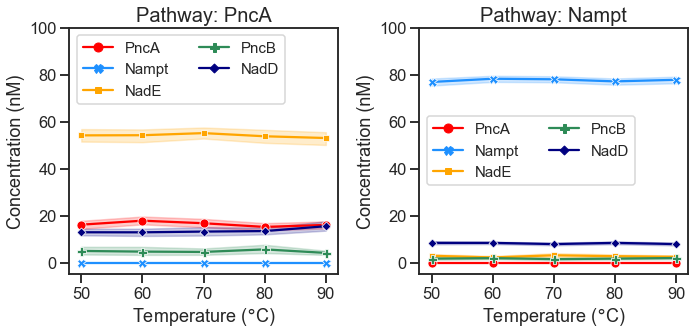

In [24]:
# df = pd.read_csv('optimisedET_maxNAD.csv', sep='\t')
pl.subplot_abundance_objective(df=df1, objective='max_NAD', scaling=1e-10 * 1e-3 * 1e9, 
                               l1='upper left', l2='center left', figsize=(10, 5), ncol=2, 
                               ylim1=[-5., 1e2], ylim2=[-5., 1e2], filename='../images/new_optimisedET_max_NAD_1.png')

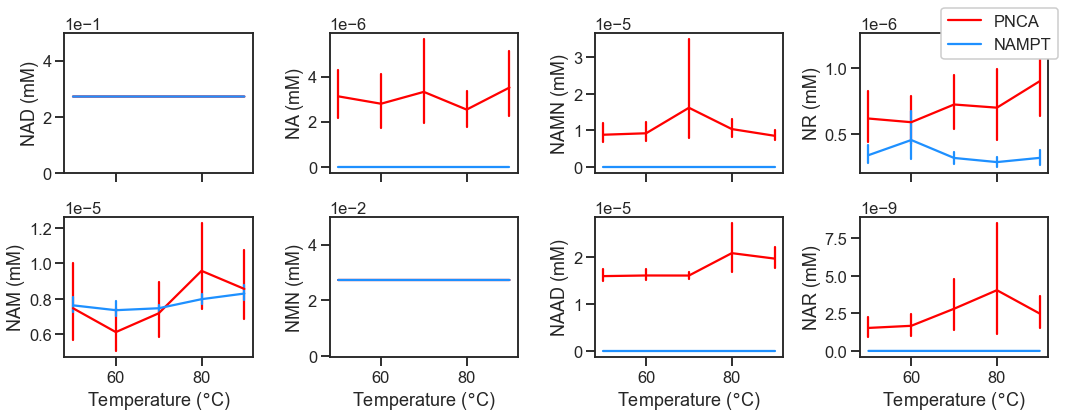

In [3]:
C = pd.read_csv('../data/concentrations_max_NAD_1.csv', sep='\t', index_col=0)
C = C.rename(columns={'NaMN': 'NAMN', 'NaAD': 'NAAD'})
mets = ['NAD', 'NA', 'NAMN', 'NR', 'NAM', 'NMN', 'NAAD', 'NAR', 'pathway']
C = C.rename(columns={i:i+' (mM)' for i in mets[:-1]})
pl.subplots_concentration(df=sim.u.dropConstantCol(C.reset_index()), layout=(2,4), figsize=(15,6), 
                    hue='pathway', sharex=True, filename='../images/conc_max_NAD_1.png')

In [13]:
def get_steadystate_CF(df, model='../models/new/NAD_biosynthesis_PN_mATPNAD_NAD.cps'):
    CP, FP = sim.getsteadystates(filepath_CPSmodel=model,
                                 Optdf=df[df.pathway == 'PNCA'].reset_index().drop(['Sol', 'objective', 'pathway'], axis=1))
    CP['pathway'] = 'PNCA'
    FP['pathway'] = 'PNCA'
    CN, FN = sim.getsteadystates(filepath_CPSmodel=model,
                                 Optdf=df[df.pathway == 'NAMPT'].reset_index().drop(['Sol', 'objective', 'pathway'], axis=1))
    CN['pathway'] = 'NAMPT'
    FN['pathway'] = 'NAMPT'
    C = pd.concat((CP, CN))
    F = pd.concat((FP, FN))
    #F = sim.calculateATPconsFlux(F)
    return C, F


In [15]:
df = pd.read_csv('../data/new_PN_Keq_max_NAD_1.csv', sep='\t', index_col=0)
df1 = df.replace([np.inf, -np.inf], np.nan)
df1['objective'] = 'max_NAD'
df1.loc[(df1.ET_NAMPT <= 0.001), 'pathway'] = 'PNCA'
df1.loc[(df1.ET_PNCA <= 0.001), 'pathway'] = 'NAMPT'
df1 = df1.dropna(axis=0)
C, F = get_steadystate_CF(df=df1, model='../models/submission/NAD_biosynthesis_PN_Keq_max_NAD.cps')

Steady-state not found for 2
Steady-state not found for 11
Steady-state not found for 14
Steady-state not found for 16
Steady-state not found for 30
Steady-state not found for 42
Steady-state not found for 51
Steady-state not found for 56
Steady-state not found for 59
Steady-state not found for 76
Steady-state not found for 87
Steady-state not found for 115
Steady-state not found for 120
Steady-state not found for 127
Steady-state not found for 131
Steady-state not found for 139
Steady-state not found for 185
Steady-state not found for 203
Steady-state not found for 210
Steady-state not found for 219
Steady-state not found for 227
Steady-state not found for 233
Steady-state not found for 237
Steady-state not found for 253
Steady-state not found for 273
Steady-state not found for 288
Steady-state not found for 305
Steady-state not found for 332
Steady-state not found for 358
Steady-state not found for 363
Steady-state not found for 373
Steady-state not found for 376
Steady-state not fou

In [18]:
C.to_csv('../data/concentrations_max_NAD_1.csv', sep='\t')
F.to_csv('../data/fluxes_max_NAD_1.csv', sep='\t')

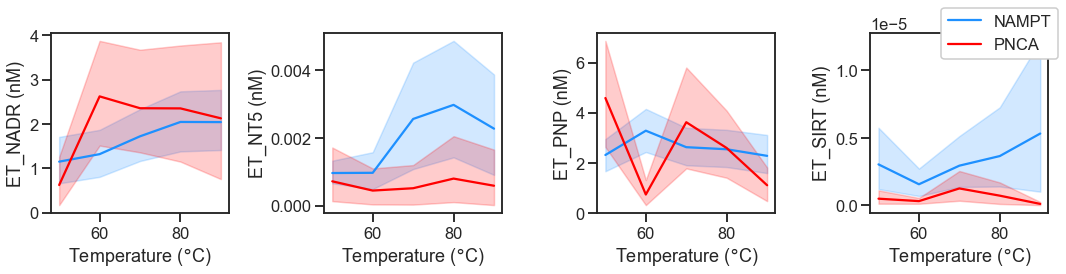

In [4]:
df = pd.read_csv('../data/new_PN_Keq_min_ATP.csv', sep='\t', index_col=0)
#df.loc[(df.pathway=='NAMPT'), 'pathway'] = 'NADV'
df = df.rename(columns=enames)
cols = ['ET_NADR', 'ET_NT5', 'ET_PNP', 'ET_SIRT']
df[cols] = df[cols] * 1e-10 * 1e-3 * 1e9
df = df.rename(columns={i:i+' (nM)' for i in cols})
pl.subplot_lineplot(df=df.drop(['ET_PNCA', 'ET_NAMPT', 'ET_NADE', 'ET_PNCB', 'ET_NADD'], axis=1), 
                    layout=(1,4), figsize=(15, 4), hue='pathway', err_style='band', palette=['#1E90FF', '#FF0000'],
                    filename='../images/se_enzymes_min_ATP.png')

In [3]:
# F = pd.read_csv('../data/fluxes_max_NAD.csv', sep='\t', index_col=0)
F = pd.read_csv('../data/fluxes_max_NAD_1.csv', sep='\t', index_col=0)
F = sim.calculateATPconsFlux(F).reset_index()
F.pathway = F.pathway.replace({'NAMPT': 'Nampt', 'PNCA': 'PncA'})
cols = ['PNCA', 'NAPRT', 'NMNAT1-NaMN', 'NADS', 'SIRT', 'NAMPT', 'NMNAT1-NMN',
        'NT5-NaMN', 'NT5-NMN', 'NRK1-NMN', 'PNP-NR', 'NRK1-NaMN', 'PNP-NAR',
        'NMN thermolysis', 'NaMN thermolysis', 'NAR thermolysis',
        'NR thermolysis', 'NAD thermolysis', 'ATP consumption', 'NAD production', 'ATPconsNADprod',
        'pathway', 'objective']

In [7]:
F = F.reset_index()

In [8]:
F = F.loc[~(F.temperature<60.0) & (F.temperature>56.0)]#.temperature.unique()

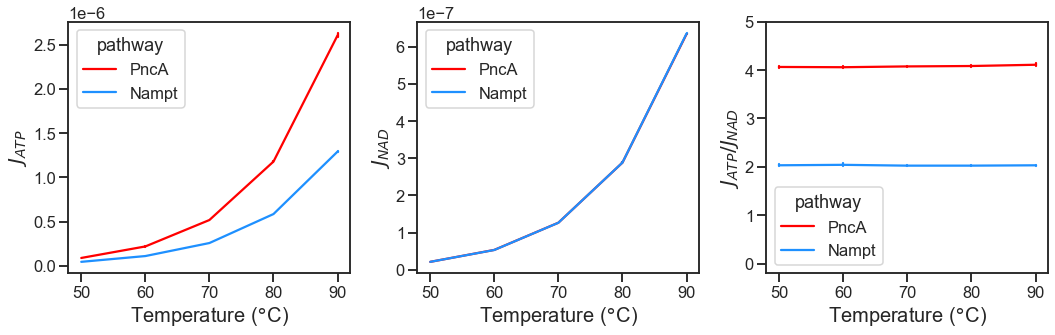

In [17]:
#F.loc[(F.pathway=='NAMPT'), 'pathway'] = 'NADV'
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
lp = sns.lineplot(data=F, x='temperature', y='ATP consumption', hue='pathway', hue_order=['PncA', 'Nampt'], 
                  palette=['#FF0000', '#1E90FF'], ax=ax[0], err_style="bars")
ax[0].set_ylabel('$J_{ATP}$', fontsize=20)
ax[0].set_xlabel('Temperature ($\degree$C)', fontsize=20)
#ax[0].set_ylim([-1e-5, 1e-3])

lp = sns.lineplot(data=F, x='temperature', y='NAD production', hue='pathway', hue_order=['PncA', 'Nampt'],
                  palette=['#FF0000', '#1E90FF'], ax=ax[1], err_style="bars")
ax[1].set_ylabel('$J_{NAD}$', fontsize=20)
ax[1].set_xlabel('Temperature ($\degree$C)', fontsize=20)

lp = sns.lineplot(data=F, x='temperature', y=F.ATPconsNADprod, hue='pathway', hue_order=['PncA', 'Nampt'],
                  palette=['#FF0000', '#1E90FF'], ax=ax[2], err_style="bars")
ax[2].set_ylabel('$J_{ATP}/J_{NAD}$', fontsize=20)
ax[2].set_xlabel('Temperature ($\degree$C)', fontsize=20)
ax[2].set_ylim([-2e-1, 5])
plt.tight_layout()
fig.savefig('../images/flux_max_NAD_1.png', dpi=300)

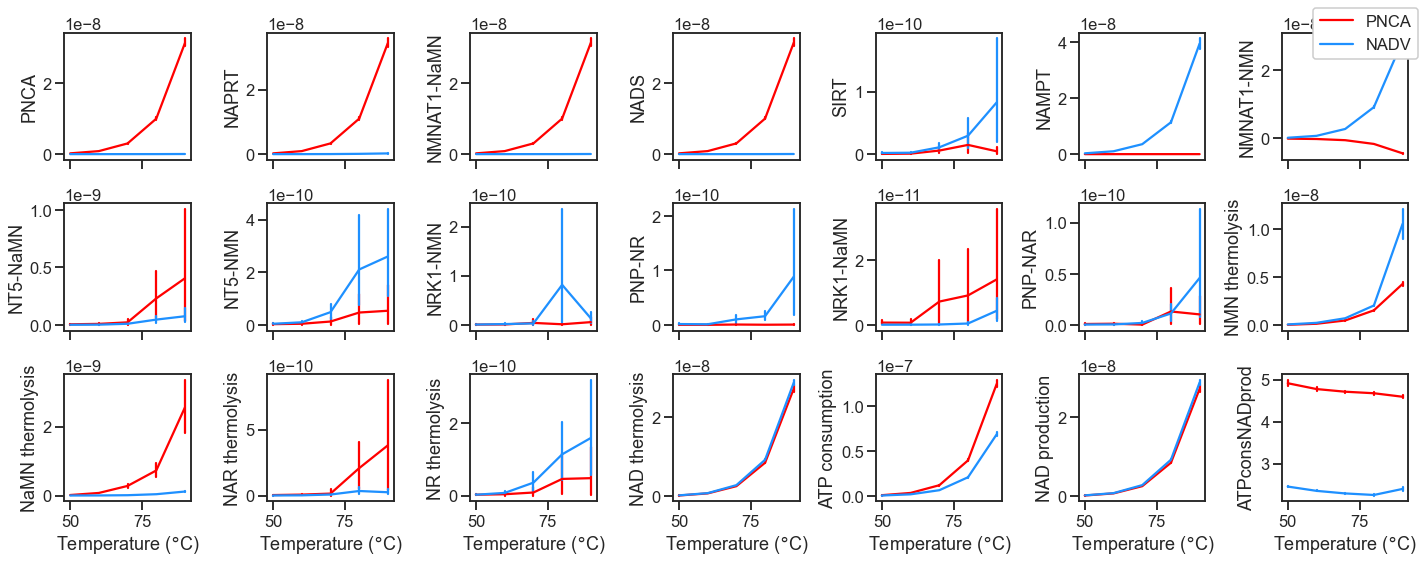

In [13]:
pl.subplot_lineplot(df=F[cols], layout=(3,7), figsize=(20,8), hue='pathway', sharex=True)

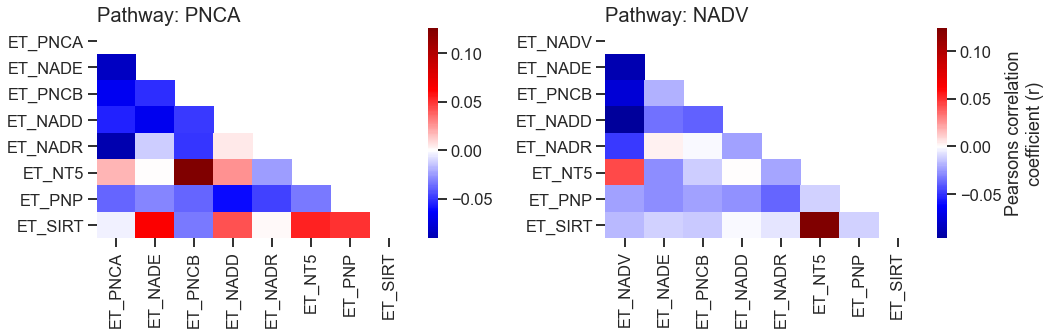

In [16]:
df = pd.read_csv('../data/new_PN_Keq_min_ATP.csv', sep='\t', index_col=0)
df.loc[(df.pathway=='NAMPT'), 'pathway'] = 'NADV'
df = df.rename(columns=enames)
cols = ['ET_PNCA', 'ET_NADV', 'ET_NADE', 'ET_PNCB', 'ET_NADD', 'ET_NADR', 'ET_NT5', 'ET_PNP', 'ET_SIRT']
pl.plot_corr(dfP=df[(df.objective=='min_ATP') & (df.pathway=='PNCA')][cols[:1]+cols[2:]], 
             dfN=df[(df.objective=='min_ATP') & (df.pathway=='NADV')][cols[1:]], figsize=(15,5), sharey=False,
             filename='../images/new_corr_optimisedET_min_ATP.png')